# IMDB Classification - Bag of Words and Embeddings

This tutorial will go through steps for building a deep learning model for sentiment Analysis. We will classify IMDB movie reviews as either positive or negative. This tutorial will be used for teaching during the workshop.

The tutorial has taken contents from various places including the tutorial from http://www.hvass-labs.org/ for the purpose of teaching in the deep learning class.

The topics addressed in the tutorial:

1. Basic exploration of the IMDB movies dataset.
2. Tokenization, text to sequences, padding and truncating
3. Building NN Model using Bag Of Words
4. Building NN Model using Embeddings
5. Peeping to Word Embeddings

We will be exploring mostly how to use Bag of Words and Word Embeddings vector representation of texts and build plain vanila NN models. In the future tutorials, we will explore RNN, LSTM models in the future.

### IMDB Movie Reviews

The dataset is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

**Data Fields**

- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the review

In [1]:
%load_ext tensorboard

### Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
imdb_df = pd.read_csv('labeledTrainData.tsv',
                      sep = '\t')

In [14]:
pd.set_option('display.max_colwidth', 2000)
imdb_df.head(5)

,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people e..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \""critics\"". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \""critics\"" perceive to be its shortcomings."""
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fig

In [9]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [10]:
imdb_df.sentiment.value_counts()

,count
sentiment,
1,12500
0,12500


### Data Tokenization

The text data need to be converted into vectors using either bag of words or embeddings model. We will first explore bag of words (BOW) model. In the BOW model, a sentence will be represented as a vector with the words (also called tokens) as dimensions of the vectors.

For the purpose of creating vectors, we need to tokenize the sentences first and find out all unique tokens (words) used across all sentences. The corpus of unquie words used could very large, so we can limit the corpus of tokens by using only the most popular (frequently used) words. In this example, we will use 10000 words.

In [5]:
import os
#os.environ["KERAS_BACKEND"] = "tensorflow"

In [6]:
import keras
print(keras.__version__)

3.10.0


### Encode Y Variable

In [7]:
y = np.array(imdb_df.sentiment)

In [8]:
y[0:5]

array([1, 1, 0, 0, 1])

How many classes available?

In [15]:
imdb_df.sentiment.unique()

array([1, 0])

Now we will pad or truncate. But padding or truncating can be done at the beginning of the sentence or at the end of the sentences. *pre* or *post* can be used to specify the padding and truncating the beginning or end of sentence.

In [101]:
max_num_tokens = 10000
max_review_length = 500

In [102]:
from keras.layers import TextVectorization

In [103]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [104]:
vectorize_layer.adapt(list(imdb_df.review))

In [105]:
vectorize_layer.get_vocabulary()[0:20]

['',
 '[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('a'),
 np.str_('of'),
 np.str_('to'),
 np.str_('is'),
 np.str_('in'),
 np.str_('it'),
 np.str_('i'),
 np.str_('this'),
 np.str_('that'),
 np.str_('br'),
 np.str_('was'),
 np.str_('as'),
 np.str_('for'),
 np.str_('with'),
 np.str_('movie'),
 np.str_('but')]

In [106]:
vectorize_layer(["I like the movie gladiator"])[0][0:50]

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([  10,   39,    2,   18, 8988,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])>

In [107]:
vectorize_layer(imdb_df.review[0:1])[0][0:50]

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([  17,   32,   11,  536,  166,  187,   31,    2,  552,   17, 9965,
        195,  628, 2611,    6,   25,  223,  147,    2, 1028,  671,  132,
          3,   48,  284,    2,    1,    3,  284,    1,  173,  270,   10,
         41,  178,    6,   76,    4,  772, 2526,   78,   11,  230,   37,
         10,  199,   14,   63,  652,    8])>

### Split Datasets

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(imdb_df.review,
                                                    imdb_df.sentiment,
                                                    test_size = 0.2)

In [110]:
X_train.shape

(20000,)

In [111]:
X_test.shape

(5000,)

In [112]:
input_shape = X_train.shape

In [113]:
input_shape

(20000,)

### Using Embeddings

In Word embeddings, words are represented by a vector i.e. series of numbers (weights). The vectors represent words in a N dimension space, in which similar meaning words are places nearer to each other while the dissimilar words are kept far. The dimensions in the space represent some latent factors, by which the words could be defined. All words are assigned some weights in each each latent factors. Words that share some common meaning have similar weights across common factors.

The word embeddings weights can be estimated during the NN model building. There are also pre-built word embeddings are available, which can be used in the model. We will discuss about the pre-built word embeddings later in the tutorial.

Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed. Given its widespread use, this post seeks to introduce the concept of word embeddings to the prospective NLP practitioner.

Here are couple of good references to understand embeddings

https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a

(Bag of words) -> Embeddings (8) -> Dense Layer(16) ->  Relu -> Dense Layer(1) -> Sigmoid

In [114]:
from keras.layers import Embedding
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout

In [115]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [116]:
vectorize_layer.adapt(list(X_train))

In [117]:
train_ds = vectorize_layer(X_train)

In [92]:
keras.backend.clear_session()  # clear default graph

emb_model = Sequential()
emb_model.add(keras.Input(shape=(max_review_length,)))
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model.add(Embedding(max_num_tokens, 8))

# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model.add(Flatten())

emb_model.add(Dense(16))
emb_model.add(Activation('relu'))

# We add the classifier on top
emb_model.add(Dense(1))
emb_model.add(Activation('sigmoid'))

In [36]:
emb_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        64,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,033 (562.63 KB)

 Trainable params: 144,033 (562.63 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
sgd = SGD(learning_rate=0.01, momentum=0.8)

In [38]:
emb_model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1,
                                    patience=2),
                  keras.callbacks.EarlyStopping(monitor='val_loss',
                                patience=6),
                  keras.callbacks.TensorBoard(log_dir="klogs", histogram_freq=1)]

In [40]:
emb_history = emb_model.fit(train_ds,
                            y_train,
                            epochs=20,
                            batch_size=32,
                            callbacks = callbacks_list,
                            validation_split=0.3)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.4927 - val_loss: 0.6936 - learning_rate: 0.0100
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5218 - loss: 0.6918 - val_accuracy: 0.5337 - val_loss: 0.6911 - learning_rate: 0.0100
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5443 - loss: 0.6884 - val_accuracy: 0.5675 - val_loss: 0.6859 - learning_rate: 0.0100
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5980 - loss: 0.6789 - val_accuracy: 0.5887 - val_loss: 0.6712 - learning_rate: 0.0100
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6490 - loss: 0.6501 - val_accuracy: 0.6573 - val_loss: 0.6264 - learning_rate: 0.0100
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6937 - loss: 0.5906 - val_accuracy: 0.6823 - val_loss: 0.6155 - learning_rate: 0.0100
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7502 - loss: 0.5254 - 

#### Conclusion:

The model is overfitting. The training accuracy is about 98%, whereas the validation accuracy is 80%.

### Model 4

Add a dropout layer as a regularization layer for dealing with overfitting.

In [133]:
keras.backend.clear_session()  # clear default graph

emb_model_2 = Sequential()
emb_model_2.add(keras.Input(shape=(max_review_length,)))
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model_2.add(Embedding(max_num_tokens, 8))

# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model_2.add(Flatten())

emb_model_2.add(Dense(16))
emb_model_2.add(Activation('relu'))

emb_model_2.add(Dropout(0.8))

# We add the classifier on top
emb_model_2.add(Dense(1))
emb_model_2.add(Activation('sigmoid'))

In [134]:
emb_model_2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [135]:
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1,
                                    patience=2),
                  keras.callbacks.EarlyStopping(monitor='val_loss',
                                patience=6),
                  keras.callbacks.TensorBoard(log_dir="klogs1", histogram_freq=1)]

In [136]:
emb_history = emb_model_2.fit(train_ds,
                              y_train,
                              epochs=20,
                              batch_size=32,
                              callbacks = callbacks_list,
                              validation_split=0.3)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4993 - loss: 0.6939 - val_accuracy: 0.5410 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6547 - loss: 0.6104 - val_accuracy: 0.8018 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8106 - loss: 0.3895 - val_accuracy: 0.8360 - val_loss: 0.3662 - learning_rate: 0.0010
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8570 - loss: 0.2952 - val_accuracy: 0.8478 - val_loss: 0.3542 - learning_rate: 0.0010
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8759 - loss: 0.2559 - val_accuracy: 0.8565 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8876 - loss: 0.2053 - val_accuracy: 0.8460 - val_loss: 0.3999 - learning_rate: 0.0010
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8953 - loss: 0.1765 - 

In [132]:
#%tensorboard --logdir klogs1

### Checking performance on test set

We will use the model 4 for checking performance on test set and making predictions.

In [137]:
test_ds =  vectorize_layer(X_test)

In [138]:
result = emb_model_2.evaluate(test_ds, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8578 - loss: 0.4155


In [139]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 85.38%


### Predicting Test Data and Confusion Matrix

We will predict the classes using model 4 and build the confusion matrix to understand precision and recall.

In [140]:
y_pred_probs = emb_model_2.predict(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [141]:
y_pred = np.where(y_pred_probs >= 0.5, 1,0)

In [142]:
from sklearn import metrics

cm = metrics.confusion_matrix( y_test,
                            y_pred, labels = [1,0] )

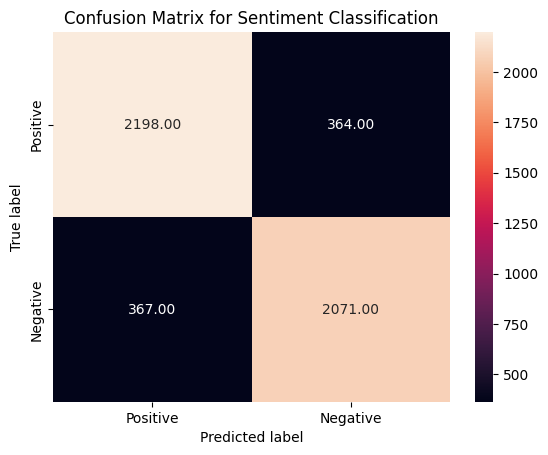

In [143]:
sn.heatmap(cm, annot=True,
           fmt='.2f',
           xticklabels = ["Positive", "Negative"] ,
           yticklabels = ["Positive", "Negative"] )

plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.title( 'Confusion Matrix for Sentiment Classification');

In [144]:
from sklearn.metrics import classification_report

In [145]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2438
           1       0.86      0.86      0.86      2562

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



# Peeping into Embeddings

We will look at the embeddings estimated for different words and if they are placed neared or far as per their meaning.

In [146]:
layer_embedding = emb_model_2.get_layer('embedding')

In [147]:
weights_embedding = layer_embedding.get_weights()[0]

In [148]:
weights_embedding.shape

(10000, 8)

In [149]:
vocab = vectorize_layer.get_vocabulary()
vocab[0:20]

['',
 '[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('a'),
 np.str_('of'),
 np.str_('to'),
 np.str_('is'),
 np.str_('in'),
 np.str_('it'),
 np.str_('i'),
 np.str_('this'),
 np.str_('that'),
 np.str_('br'),
 np.str_('was'),
 np.str_('as'),
 np.str_('for'),
 np.str_('with'),
 np.str_('movie'),
 np.str_('but')]

In [150]:
vocab.index("the")

2

In [151]:
def get_embeddings( word ):
    token = vocab.index(word)
    return weights_embedding[token]

In [152]:
good = get_embeddings('good')
good

array([-0.03292858,  0.02972132, -0.09028355, -0.10874438,  0.01068609,
       -0.0076701 ,  0.10699909,  0.01667854], dtype=float32)

In [153]:
great = get_embeddings('great')
great

array([-3.30358148e-01,  1.11096591e-01, -3.31170410e-01, -2.68838614e-01,
        1.32009125e-04,  1.08126216e-01,  3.32091600e-02,  2.11039335e-01],
      dtype=float32)

In [154]:
bad = get_embeddings('bad')
bad

array([ 0.3862619 ,  0.09846237,  0.43902543,  0.29108796,  0.00241465,
       -0.03990836, -0.15179211, -0.08370558], dtype=float32)

In [155]:
terrible = get_embeddings('terrible')
terrible

array([ 0.37022606, -0.12541774,  0.40620595,  0.26425016, -0.06947496,
        0.0204603 , -0.20674254, -0.16930678], dtype=float32)

We will calculate the euclidean distance between the word embeddings.

In [156]:
from scipy.spatial.distance import cdist

In [157]:
def get_distance( word1, word2 ):

    word1_token = vocab.index(word1)
    word2_token = vocab.index(word2)

    return cdist([weights_embedding[word1_token]],
                 [weights_embedding[word2_token]],
                 metric = 'euclidean')

In [158]:
get_distance( 'good',
             'awesome' )

array([[0.23725278]])

In [159]:
get_distance( 'good', 'bad' )

array([[0.83584536]])

In [160]:
get_distance( 'bad', 'terrible' )

array([[0.26708883]])

In [161]:
get_distance( 'great', 'terrible' )

array([[1.26072805]])

In [162]:
get_distance( 'like',
             'love' )

array([[0.35480205]])

In [165]:
get_distance( 'liked',
             'hated' )

array([[0.77586752]])

It can be observed that the words *good* and *great* are places together, while *bad* and *terrible* are place together. And the words *good* and *terrible* are place far. This indicates the embeddings have incorporated the meaning of the words as per how they are used in the sentences expressing positive and negative sentiments.

## Storing Embeddings

In [166]:
import numpy as np

# Assume you used a TextVectorization layer
vocab = vectorize_layer.get_vocabulary()  # list of words

print(len(vocab))

# Save embeddings
weights_embedding = layer_embedding.get_weights()[0]

print(weights_embedding.shape)

np.savetxt("tensor.tsv", weights_embedding, delimiter="\t")

# Save metadata
with open("metadata.tsv", "w", encoding='utf-8') as f:
    for word in vocab:
      if word == "":
        f.write(f"[sp]\n")
      else:
        f.write(f"{word}\n")

10000
(10000, 8)


Some more examples expressing sentiments.

### Participant Exercise: 1

- Build a model with an embedding layer of 16 or 32
- Add one more dense layer
- Change the number of neurons in dense layer
- Build a model and check accuracy


### Participant Exercise: 2

- Explore words, their embeddings and distances between them.

## Excellent References

For further exploration and better understanding, you can use the following references.

- Glossary of Deep Learning: Word Embedding

    https://medium.com/deeper-learning/glossary-of-deep-learning-word-embedding-f90c3cec34ca


- wevi: word embedding visual inspector

    https://ronxin.github.io/wevi/  
    
    
- Learning Word Embedding    

    https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html


- On the contribution of neural networks and word embeddings in Natural Language Processing

    https://medium.com/@josecamachocollados/on-the-contribution-of-neural-networks-and-word-embeddings-in-natural-language-processing-c8bb1b85c61c